# Control theory and Vicsek Model - Clustering analysis : dynamics of clusters over time, graph theory applied to clustering

## Importing modules and libraries 

In [2]:
# General imports
import matplotlib.pyplot as plt
import sys
from IPython.display import Video, display
from IPython.display import HTML

In [3]:
# Module imports
sys.path.append('..')
import models.vicsek as vicsek
import models.pid as pid
import visualisation as visualisation
import utils


## Example of simulation 

In [4]:
# Initialize the Vicsek model.
radius = 1
L = 25
N = 50

In [5]:
# simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius, noiseAmplitude=0.1)
simulator = pid.PID_Flock(numberOfParticles=N, domainSize=(L, L), radius=radius, noiseAmplitude=0.1, Kp=0.9812, Ki=0.1929, Kd=0.)
# Simulate the model.
simulationData = simulator.simulate()

In [6]:
df = utils.simulationDataToDataframe(simulationData)
df.to_csv('../data/vicsek.csv', index=False)

In [7]:
# df_labels = utils.clusters_over_time(df, k_coef=1.5, L=L, min_samples=5)
df_labels = utils.clusters_over_time(df, func=utils.periodic_clustering_labels_pos_ang, k_coef=1.5, L=L, delta_theta = 0.5, min_samples=5)
df_labels.to_csv('../data/vicsek_labels.csv', index=False)

In [8]:
df_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1,0,0,0,-1,0,0,-1,0,-1,...,-1,1,-1,-1,1,-1,-1,-1,-1,1
1,-1,0,0,0,0,0,0,-1,0,-1,...,-1,1,-1,-1,1,-1,-1,-1,-1,1
2,-1,0,0,0,0,0,0,-1,0,-1,...,-1,1,-1,-1,1,-1,-1,-1,-1,1
3,-1,0,0,0,0,0,0,-1,0,-1,...,-1,1,-1,-1,1,-1,-1,-1,-1,-1
4,-1,0,0,0,0,0,0,-1,0,-1,...,-1,1,-1,-1,1,-1,-1,-1,-1,-1


In [9]:
data = df_labels.to_numpy()
mask_noise = data[0,:] == -1

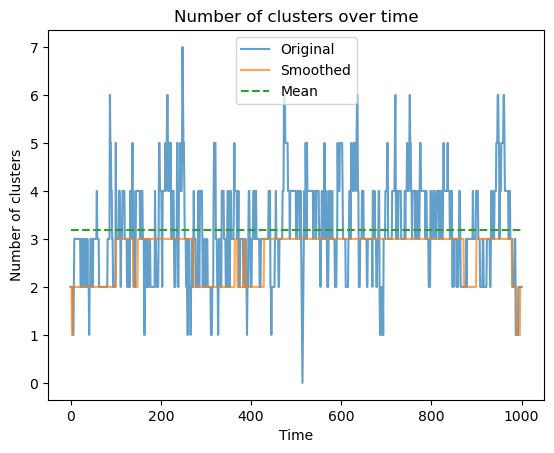

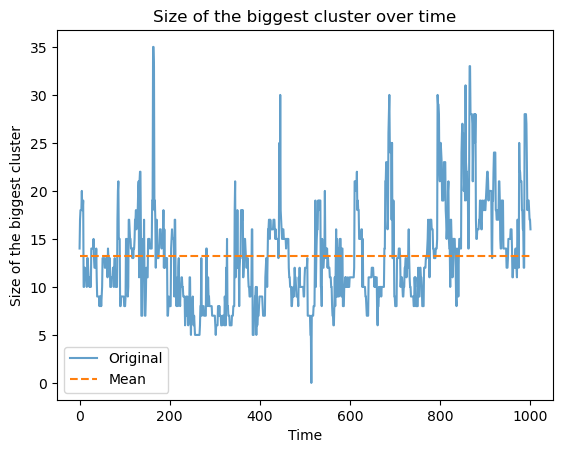

In [10]:
cluster_count_arr = utils.cluster_count(df_labels)
cluster_sizes_arr = utils.cluster_biggest_size(df_labels)

fig, ax = visualisation.plot_series_mean_smoothed(cluster_count_arr, 50, 'Number of clusters over time', 'Time', 'Number of clusters')
plt.show()
fig, ax = visualisation.plot_series_mean_smoothed(cluster_sizes_arr, 0, 'Size of the biggest cluster over time', 'Time', 'Size of the biggest cluster')
plt.show()


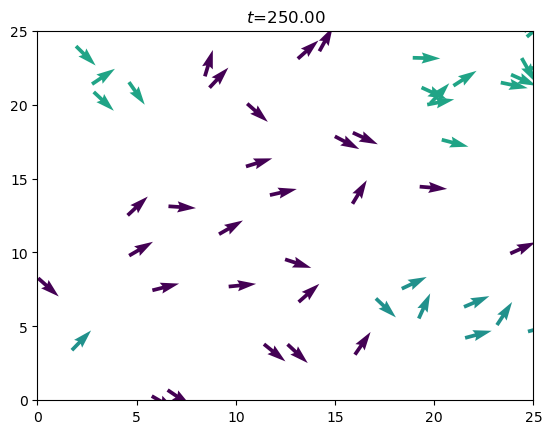

In [11]:
animation = visualisation.animate_simulation2D_colored(df, df_labels, L)
animation.save('../data/vicsekpouet.mp4', writer='ffmpeg', fps=30)

In [12]:
HTML(animation.to_html5_video())


Data created. Now plotting...


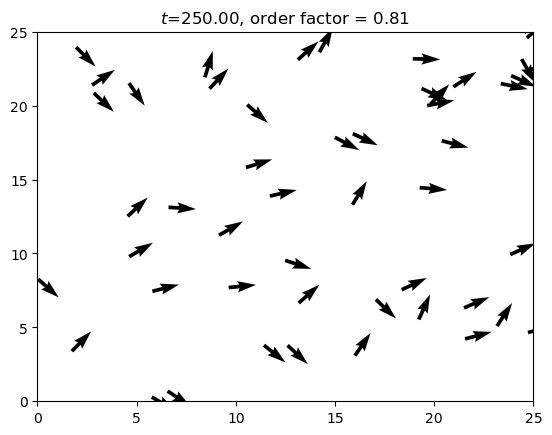

In [13]:
animation = visualisation.animate_simulation2D(df, L)
animation.save('../data/vicsekincroyab.mp4', writer='ffmpeg', fps=30)

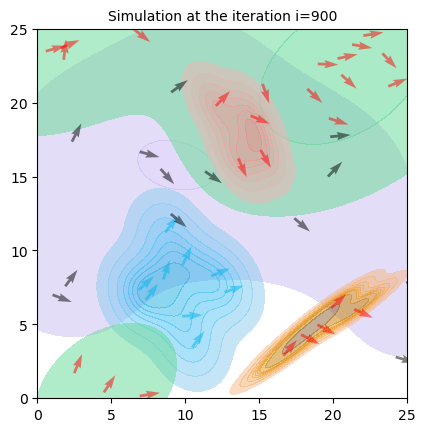

In [14]:
visualisation.plot_clusters(df, 900, labels=df_labels.iloc[900], L=L)
plt.show()

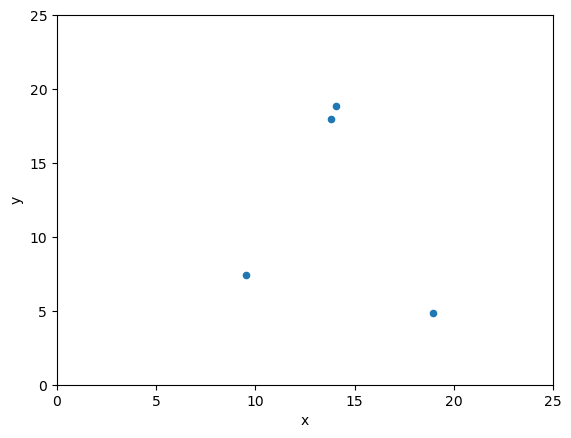

In [15]:
df_all = utils.get_positions_and_angles(df, 900)
df_centroids = utils.get_centroids(df_all, df_labels.iloc[900])
df_centroids.plot(x='x', y='y', kind='scatter', xlim=(0, L), ylim=(0, L))
plt.show()